In [1]:
import json

with open('../data/contact_extraction1/test/raw/contact_cases.json', 'r') as f:
    test = json.load(f)
    print(len(test))
    
with open('../data/contact_extraction1/train/raw/contact_cases.json', 'r') as f:
    train = json.load(f)
    print(len(train))
    
with open('../data/contact_extraction1/val/raw/contact_cases.json', 'r') as f:
    val = json.load(f)
    print(len(val))

129
386
129


In [11]:
samples = {}
i = 1
for subset in [train, test, val]:
    for idx, sample in subset.items():
        samples[f'sample_{i}'] = sample
        i += 1

In [2]:
train_test_split(list(samples.keys()), train_size=0.6, stratify=cases)

NameError: name 'train_test_split' is not defined

In [14]:
cases_train = [sample['case'] for _, sample in train.items()]
cases_test = [sample['case'] for _, sample in test.items()]
cases_val = [sample['case'] for _, sample in val.items()]

In [31]:
import numpy as np
np.unique(cases_val, return_counts=True), len(cases_val)

((array([  1,   2,   3,   4,   6,   7,   8,  10,  13,  14,  15,  16,  18,
          19,  20,  21,  23,  24,  26,  27,  29,  35,  36,  38,  42,  46,
          47,  48,  49,  50,  51,  53,  54,  55,  56,  57,  60,  61,  62,
          63,  64,  66,  67,  68,  69,  71,  72,  73,  74,  76,  77,  78,
          79,  80,  81,  83,  84,  85,  86,  87,  88,  89,  92,  93,  94,
          96,  99, 100, 101, 102, 105, 106, 107, 109, 112, 115, 116, 117,
         118, 119, 120, 126, 128, 129]),
  array([2, 1, 2, 2, 1, 1, 1, 3, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
         2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 2, 3,
         1, 1, 3, 2, 1, 1, 1, 2, 3, 2, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1,
         1, 3, 2, 3, 3, 1, 1, 2, 2, 1, 4, 1, 1, 1, 1, 2, 1, 2])),
 129)

In [136]:
tr, va = train_test_split(cases[:, 0], stratify=cases[:, 1], train_size=0.6)

In [138]:
cases_tr = [samples[idx]['case'] for idx in tr]
cases_va = [samples[idx]['case'] for idx in va]

In [139]:
np.unique(cases_tr, return_counts=1), np.unique(cases_va, return_counts=1)

((array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
          14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
          27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
          40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
          53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
          66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
          79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
          92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
         105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
         118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129]),
  array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
         3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
         2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
         3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

(array([3., 4., 4., 4., 4., 3., 4., 4., 4., 4., 4., 3., 3., 4., 4., 4., 4.,
        4., 4., 3., 4., 4., 4., 3., 4., 4., 4., 3., 4., 3., 4., 3., 4., 4.,
        4., 4., 3., 4., 3., 4., 3., 4., 4., 4., 3., 4., 4., 4., 3., 4., 4.,
        3., 3., 4., 4., 4., 3., 4., 4., 3., 4., 3., 4., 3., 4., 3., 4., 4.,
        4., 4., 4., 3., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 3., 4.,
        4., 3., 4., 3., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
        4., 4., 4., 4., 4., 4., 4., 4., 3., 4., 4., 3., 4., 3., 4., 4., 3.,
        4., 4., 4., 3., 3., 3., 4., 4., 7.]),
 array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
         12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
         23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
         34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
         45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
         56.,  57.,  58.,  59.,  60.,  61.,  62.,  6

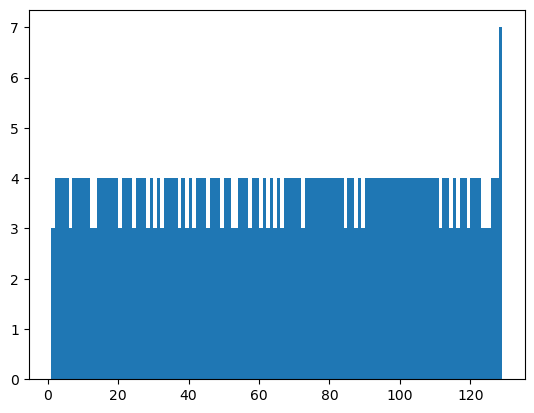

In [132]:
plt.hist(cases_tr, bins=128)

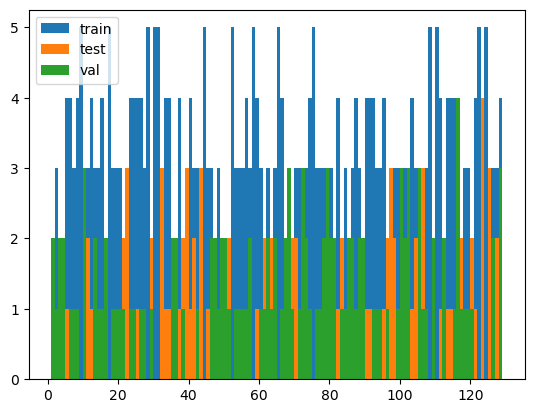

In [32]:
import matplotlib.pyplot as plt

plt.hist(cases_train, bins=128, label='train')
plt.hist(cases_test, label='test', bins=128)
plt.hist(cases_val, label='val', bins=128)

plt.legend()

In [50]:
cases = [(sample_id, sample['case']) for sample_id, sample in samples.items()]
cases = np.array(cases)

In [66]:
idx_case = cases[np.where(cases[:, 1] == str(i))[0], 0]
idx_case

array(['sample_88', 'sample_140', 'sample_402', 'sample_529',
       'sample_627'], dtype='<U21')

In [119]:
train_test_split(idx_case, train_size=0.6)

[array(['sample_402', 'sample_140', 'sample_529'], dtype='<U21'),
 array(['sample_88', 'sample_627'], dtype='<U21')]

In [67]:
from sklearn.model_selection import train_test_split
train_idx = []
val_idx = []
test_idx = []
for i in range(1, 130):
    idx_case = cases[np.where(cases[:, 1] == str(i))[0], 0]
    tr, val_te = train_test_split(idx_case)